# Testing `datasets` Module 

**Authorship:**
Adam Klie, *06/23/2022*
***
**Description:**
Notebook to test the `dataset`
***

In [ ]:
import numpy as np
import pandas as pd

# Autoreload extension
if 'autoreload' not in get_ipython().extension_manager.loaded:
    %load_ext autoreload
%autoreload 2

# Basic import
import eugene as eu
eu.settings.dataset_dir = "/cellar/users/aklie/projects/EUGENe/tests/_data/datasets/"
eu.__version__

# `get_dataset_info`

In [ ]:
eu.datasets.get_dataset_info()

,n_seqs,url,description
name,,,
random1000,1000,https://github.com/adamklie/EUGENe/tree/main/e...,A randomly generated set of 1000 sequences wit...
random1000_10,100,https://github.com/adamklie/EUGENe/tree/main/e...,A randomly generated set of 1000 sequences wit...
Khouiery,10,https://www.sciencedirect.com/science/article/...,This data comes from genomic sequences of Cion...
farley15,163708,https://zenodo.org/record/6863861#.YuG15uxKg-Q,This dataset represents SEL-seq data generated...
deBoer20,multiple,https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,WIP
jores21,72158|75808,https://raw.githubusercontent.com/tobjores/Syn...,WIP
deAlmeida22,402296,https://zenodo.org/record/5502060/,WIP


# `random1000`
A randomly generated set of 1000 sequences with 1 target for testing single-task learning models. Comes with EUGENe installation.

Can be generated by running the following command:

```python
eu.utils.generate_random_data(num_seqs=1000, seq_len=66, out_dir="../_data/datasets/")
```

In [30]:
random1000 = eu.datasets.random1000()
random1000

SeqData object with = 1000 seqs
seqs = (1000,)
names = (1000,)
rev_seqs = None
ohe_seqs = None
ohe_rev_seqs = None
seqs_annot: 'target'
pos_annot: PyRanges object with 1400 features
seqsm: None
uns: None

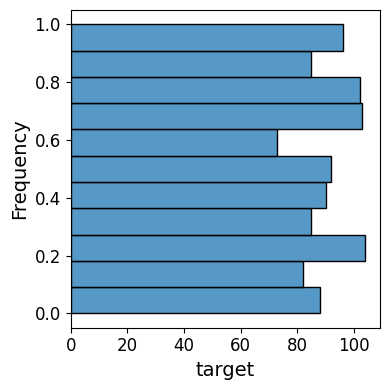

In [34]:
# These are essentially just random targets
eu.pl.histplot(
    random1000,
    keys="target",
)

No importance scores given, outputting just sequence


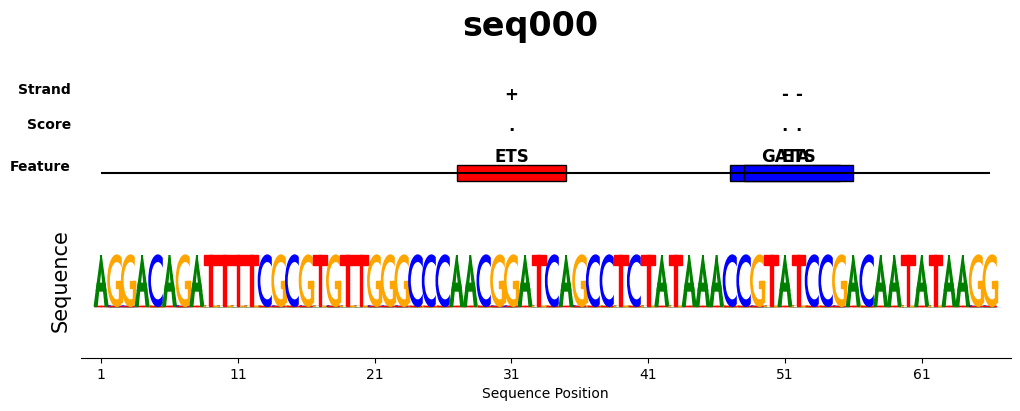

In [35]:
# Even random sequence has ETS and GATA motifs
eu.pl.seq_track(
    random1000,
    seq_id=random1000.names[0]
)

# `random1000_10`
A randomly generated set of 1000 sequences with 10 targets for testing multi-task learning models. Comes with EUGENe installation.

Can be generated by running the following command:

```python
eu.utils.generate_random_data(num_seqs=1000, seq_len=66, num_outputs=10, dataset_name="random1000_10")
```

In [37]:
random1000_10 = eu.datasets.random1000_10()
random1000_10

SeqData object with = 1000 seqs
seqs = (1000,)
names = (1000,)
rev_seqs = None
ohe_seqs = None
ohe_rev_seqs = None
seqs_annot: 'LABEL_0', 'LABEL_1', 'LABEL_2', 'LABEL_3', 'LABEL_4', 'LABEL_5', 'LABEL_6', 'LABEL_7', 'LABEL_8', 'LABEL_9', 'ACTIVITY_0', 'ACTIVITY_1', 'ACTIVITY_2', 'ACTIVITY_3', 'ACTIVITY_4', 'ACTIVITY_5', 'ACTIVITY_6', 'ACTIVITY_7', 'ACTIVITY_8', 'ACTIVITY_9'
pos_annot: None
seqsm: None
uns: None

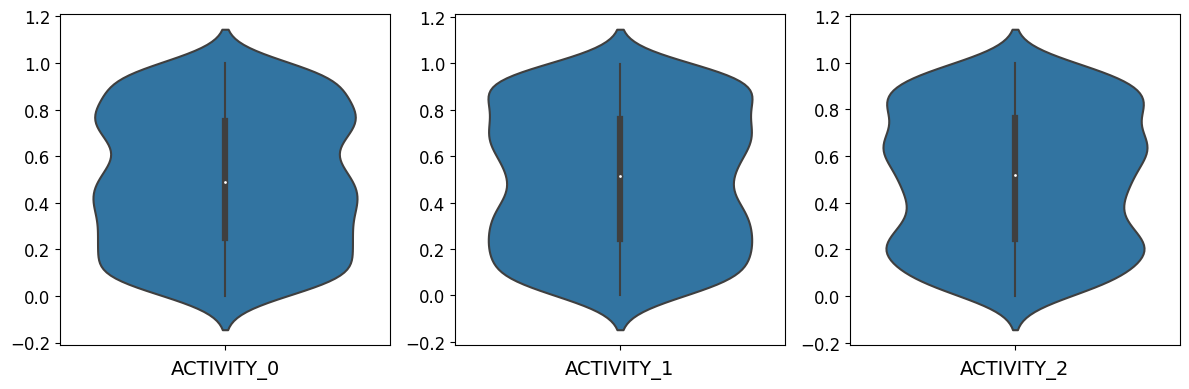

In [40]:
eu.pl.violinplot(
    random1000_10,
    keys=['ACTIVITY_0', 'ACTIVITY_1', 'ACTIVITY_2']
)

# `farley15`
This dataset represents SEL-seq data generated by first constructing a dictionary of unique barcode tag-enhancer pairs by allowing 2 bp mismatches in the ~69 bp enhancers to buffer the sequencing mistakes. If more than one barcode tag was associated with a single enhancer the maximum reads between these tags were used. Barcoded tags that were attached to multiple enhancers were removed. The resulting dictionary contains 2534802 enhancers that are uniquely mapped to one or more barcode tags. 2 biological replicates were used in this experiment and the reads per million total reads (RPM) was used for each tag. In total 163708 enhancers were detected by RNA-seq and 21799 of them were defined as active enhancers by RPM ≥ 4 in either of the 2 replicates.

In [41]:
farley15 = eu.datasets.farley15()
farley15

Dataset farley15 farley2015_seqs.csv has already been dowloaded.
Dataset farley15 farley2015_seqs_annot.csv has already been dowloaded.


SeqData object with = 163708 seqs
seqs = (163708,)
names = (163708,)
rev_seqs = None
ohe_seqs = None
ohe_rev_seqs = None
seqs_annot: 'Barcode', 'Biological Replicate 1 (RPM)', 'Biological Replicate 2 (RPM)'
pos_annot: None
seqsm: None
uns: None

In [52]:
farley15_sub = farley15[farley15.seqs_annot[['Biological Replicate 1 (RPM)', 'Biological Replicate 2 (RPM)']].max(axis=1) >= 4]

In [53]:
farley15_sub.pos_annot = eu.pp.convert2pyRanges(farley15_sub.names, farley15_sub.seqs)

0it [00:00, ?it/s]

No importance scores given, outputting just sequence


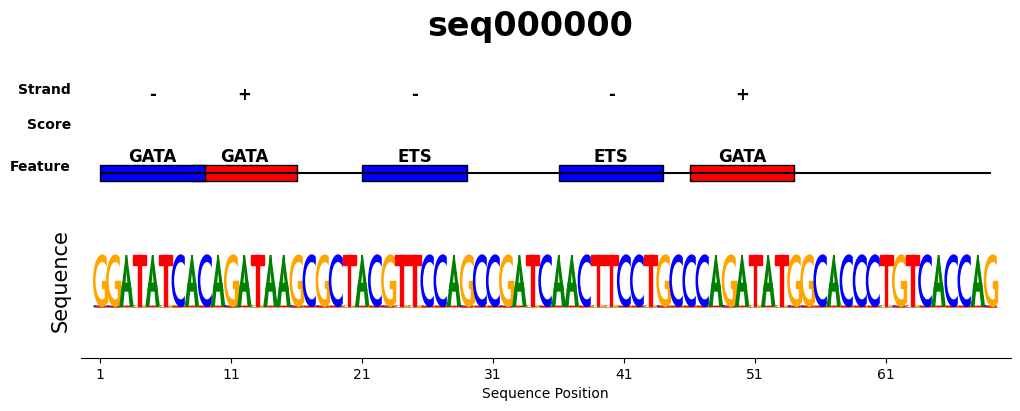

In [54]:
eu.pl.seq_track(
    farley15_sub,
    seq_id=farley15_sub.names[0],
)

# `deBoer20`

In [ ]:
deBoer20_1 = eu.datasets.deBoer20(0)
deBoer20_1

# `jores21`

In [27]:
eu.datasets.jores21(dataset="leaf"), eu.datasets.jores21(dataset="proto")

Dataset jores21 CNN_test_leaf.tsv has already been dowloaded.
Dataset jores21 CNN_train_leaf.tsv has already been dowloaded.
Finished downloading CNN_train_proto.tsv
Finished downloading CNN_test_proto.tsv


(SeqData object with = 72158 seqs
 seqs = (72158,)
 names = (72158,)
 rev_seqs = None
 ohe_seqs = None
 ohe_rev_seqs = None
 seqs_annot: 'set', 'sp', 'gene', 'enrichment'
 pos_annot: None
 seqsm: None
 uns: None,
 SeqData object with = 75808 seqs
 seqs = (75808,)
 names = (75808,)
 rev_seqs = None
 ohe_seqs = None
 ohe_rev_seqs = None
 seqs_annot: 'set', 'sp', 'gene', 'enrichment'
 pos_annot: None
 seqsm: None
 uns: None)

# RNA Complete dataset

In [ ]:
pd.read_csv("/cellar/users/aklie/data/eugene/rna_complete/norm_data.txt.gz", sep="\t")

In [59]:
eu.utils.generate_random_data(num_seqs=1000, seq_len=66, num_outputs=10, dataset_name="random1000_10")

In [18]:
num_seqs = 1000
num_outputs = 10

In [30]:
n_digits = len(str(num_seqs-1))
ids = np.array(["seq{num:0{width}}".format(num=i, width=n_digits) for i in range(num_seqs)])

In [19]:
labels = np.random.randint(0,2,size=(num_seqs, num_outputs))
activities = np.random.rand(num_seqs, num_outputs)

In [20]:
label_cols = ["LABEL_{}".format(i) for i in range(num_outputs)]
activity_cols = ["ACTIVITY_{}".format(i) for i in range(num_outputs)]

In [45]:
test_dict = dict(dict(NAME=ids), **dict(zip(label_cols, labels.T)), **dict(zip(activity_cols, activities.T)))

In [46]:
test_dict.keys()

dict_keys(['NAME', 'LABEL_0', 'LABEL_1', 'LABEL_2', 'LABEL_3', 'LABEL_4', 'LABEL_5', 'LABEL_6', 'LABEL_7', 'LABEL_8', 'LABEL_9', 'ACTIVITY_0', 'ACTIVITY_1', 'ACTIVITY_2', 'ACTIVITY_3', 'ACTIVITY_4', 'ACTIVITY_5', 'ACTIVITY_6', 'ACTIVITY_7', 'ACTIVITY_8', 'ACTIVITY_9'])

In [47]:
pd.DataFrame(test_dict)

,NAME,LABEL_0,LABEL_1,LABEL_2,LABEL_3,LABEL_4,LABEL_5,LABEL_6,LABEL_7,LABEL_8,...,ACTIVITY_0,ACTIVITY_1,ACTIVITY_2,ACTIVITY_3,ACTIVITY_4,ACTIVITY_5,ACTIVITY_6,ACTIVITY_7,ACTIVITY_8,ACTIVITY_9
0,seq000,0,1,0,0,1,0,1,1,1,...,0.136091,0.393341,0.856728,0.371197,0.039131,0.062918,0.171280,0.726156,0.044187,0.288193
1,seq001,1,0,1,1,0,0,0,1,1,...,0.759417,0.321257,0.235287,0.259573,0.202452,0.309004,0.895309,0.759696,0.893332,0.580223
2,seq002,0,0,0,1,0,1,0,0,0,...,0.355752,0.744815,0.159422,0.120629,0.773472,0.617851,0.929572,0.190477,0.293232,0.547462
3,seq003,0,0,1,1,0,0,0,1,1,...,0.737131,0.166221,0.137907,0.420561,0.513999,0.805506,0.059836,0.971746,0.513194,0.622146
4,seq004,0,0,0,0,1,1,1,1,0,...,0.003090,0.514462,0.924040,0.358115,0.285167,0.609111,0.050351,0.631610,0.922408,0.479885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,seq995,0,1,1,0,0,1,1,1,0,...,0.856105,0.058945,0.791553,0.975106,0.775342,0.050280,0.659470,0.742035,0.643288,0.581103
996,seq996,0,0,1,1,1,1,1,0,0,...,0.089650,0.500784,0.498494,0.041080,0.630354,0.653317,0.224752,0.262105,0.153604,0.857420
997,seq997,0,1,0,0,0,0,0,1,0,...,0.275583,0.101739,0.886046,0.727605,0.327248,0.678102,0.255925,0.333556,0.676320,0.026159
998,seq998,0,1,1,1,0,1,1,0,0,...,0.428197,0.598415,0.535759,0.440924,0.270214,0.497965,0.159741,0.895670,0.512714,0.933207


In [5]:
sdata = eu.datasets.random1000()

Kept 1000 sequences with targets, dropped 0 sequences with no targets


In [6]:
eu.pp.prepare_data(sdata)

  0%|          | 0/3 [00:00<?, ?it/s]

SeqData object modified:
	rev_seqs: None -> 1000 rev_seqs added
	ohe_seqs: None -> 1000 ohe_seqs added
	ohe_rev_seqs: None -> 1000 ohe_rev_seqs added
    seqs_annot:
        + TRAIN


In [15]:
eu.datasets.farley15()

Dataset farley15 farley2015_seqs.csv has already been dowloaded.
Dataset farley15 farley2015_seqs_annot.csv has already been dowloaded.


SeqData object with = 163708 seqs
seqs = (163708,)
names = (163708,)
rev_seqs = None
ohe_seqs = None
ohe_rev_seqs = None
seqs_annot: 'Barcode', 'Biological Replicate 1 (RPM)', 'Biological Replicate 2 (RPM)'
pos_annot: None
seqsm: None
uns: None

In [12]:
eu.datasets.Khoueiry10()

Kept 20 sequences with targets, dropped 0 sequences with no targets


SeqData object with = 20 seqs
seqs = (20,)
names = (20,)
rev_seqs = None
ohe_seqs = None
ohe_rev_seqs = None
seqs_annot: 'TARGETS'
pos_annot: None

In [3]:
eu.datasets.deBoer20(0, rev_comp=True)

Dataset deBoer20 GSE104878_20160503_average_promoter_ELs_per_seq_atLeast100Counts.csv.gz has already been dowloaded.
Kept 9982 sequences with targets, dropped 0 sequences with no targets


SeqData object with = 9982 seqs
seqs = (9982,)
names = (9982,)
rev_seqs = (9982,)
ohe_seqs = None
ohe_rev_seqs = None
seqs_annot: 'TARGETS'
pos_annot: None

In [6]:
eu.datasets.deAlmeida22()

Path /cellar/users/aklie/projects/EUGENE/tests/_data/datasets/deAlmeida22 does not exist, creating new folder.
Finished downloading Sequences_Train.fa?download=1
Finished downloading Sequences_activity_Train.txt?download=1


SeqData object with = 402296 seqs
seqs = (402296,)
names = (402296,)
rev_seqs = None
ohe_seqs = None
ohe_rev_seqs = None
seqs_annot: 'Dev_log2_enrichment', 'Hk_log2_enrichment', 'Dev_log2_enrichment_scaled', 'Hk_log2_enrichment_scaled', 'Dev_log2_enrichment_quantile_normalized', 'Hk_log2_enrichment_quantile_normalized'
pos_annot: None
seqsm: None
uns: None

---